In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from sklearn.model_selection import train_test_split
import os

# 경고 메세지 무시하기
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [3]:
try:
    os.chdir("/Users/hwangseoyeon/opt/anaconda3/envs/krm_datascience/project/")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory") 

Directory changed


### 독립변수만들기

In [10]:
df = pd.DataFrame()

In [11]:
#접근성, 선호하는 여가, 노인인구수 -- > 적합한 동과 프로그램 추천
distance = pd.read_csv('202212_202212_연령별인구현황_월간.csv',encoding='cp949')
distance = distance[['행정구역','2022년12월_거주자_연령구간인구수']]
distance = distance.drop(distance.index[0])
distance

,행정구역,2022년12월_거주자_연령구간인구수
1,서울특별시 관악구 보라매동,"6,430"
2,서울특별시 관악구 청림동,"3,900"
3,서울특별시 관악구 성현동,"7,694"
4,서울특별시 관악구 행운동,"6,196"
5,서울특별시 관악구 낙성대동,"2,802"
6,서울특별시 관악구 청룡동,"6,443"
7,서울특별시 관악구 은천동,"8,405"
8,서울특별시 관악구 중앙동,"3,258"
9,서울특별시 관악구 인헌동,"5,713"
10,서울특별시 관악구 남현동,"4,167"


In [12]:
bokji = pd.read_csv('서울특별시 관악구_노인복지시설.csv',encoding='cp949')
bokji = bokji[['시설명','도로명주소']]
bokji.to_csv('관악구_복지시설.csv')
bokji

,시설명,도로명주소
0,신사동성베드로성당 시니어아카데미,서울특별시 관악구 관천로11길 124
1,청춘 아카데미,서울특별시 관악구 방천길 39
2,삼성산 노인교실,서울특별시 관악구 신림로29길 8
3,성림 노인교실,서울특별시 관악구 관천로11길 124
4,서림동현대아파트 실버교실,서울특별시 관악구 방천길 39
...,...,...
74,아가페데이케어센터,서울특별시 관악구 난곡로 341
75,신림성모성당데이케어센터,서울특별시 관악구 봉천로18길 12
76,관악노인종합사회복지관 병설 관악데이케어센터,서울특별시 관악구 보라매로 35
77,남부데이케어센터,서울특별시 관악구 조원로 166-1


In [13]:
bokji_new = pd.read_csv('관악구_복지시설.csv')
bokji_new['동위치'] = ['신사동','삼성동','서림동','신사동','삼성동','삼성동','삼성동','서림동','신원동','신원동','서원동','서원동','난곡동','신사동','신림동','인헌동','낙성대동','청룡동','청룡동','남현동','삼성동','난향동','중앙동','성현동','청림동','보라매동','행운동','보라매동','청룡동','난향동','미성동','서림동','서림동','서림동','미성동','조원동','미성동','미성동','미성동','신사동','조원동','조원동','미성동','미성동','미성동','조원동','난향동','삼성동','난곡동','미성동','보라매동','삼성동','삼성동’,’대학동','보라매동','신사동','서림동','청룡동','은천동','청룡동','서림동','미성동','성현동','난곡동','미성동','은천동','중앙동','보라매동','인헌동','난향동','보라매동','미성동','행운동','난향동','조원동','신림동','보라매동','신사동','보라매동','보라매동']
bokji_f = pd.concat([bokji,bokji_new],axis=1)
bokji_fin = bokji_f[['시설명','동위치']]
bokji_fin.columns = ['시설명','시','동위치']
bokji_final = bokji_fin.drop('시',axis=1)
bokji_final.to_csv('bokji_final.csv')

In [14]:
import csv
from collections import Counter

# 특정 속성의 열 인덱스 (0부터 시작)
target_column_index = 2  # 원하는 열의 인덱스로 변경해주세요

# CSV 파일 열기
with open('bokji_final.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)

    # 특정 속성의 값들을 담을 리스트 초기화
    target_values = []

    # 특정 속성 열만 읽어서 리스트에 저장
    for row in reader:
        target_values.append(row[target_column_index])

# 특정 속성 값들의 개수를 세기 위해 Counter 사용
value_counts = Counter(target_values)

# 결과 출력
for value, count in value_counts.items():
    print(f"{value}: {count} 개")


동위치: 1 개
신사동: 6 개
삼성동: 7 개
서림동: 7 개
신원동: 2 개
서원동: 2 개
난곡동: 3 개
신림동: 2 개
인헌동: 2 개
낙성대동: 1 개
청룡동: 5 개
남현동: 1 개
난향동: 5 개
중앙동: 2 개
성현동: 2 개
청림동: 1 개
보라매동: 9 개
행운동: 2 개
미성동: 12 개
조원동: 5 개
삼성동’,’대학동: 1 개
은천동: 2 개


In [15]:
distance['복지시설수'] = [9,1,2,2,1,5,2,2,2,1,2,2,7,6,2,5,5,1,1,12,3]
distance_fin = distance.set_index('행정구역')
distance_fin.to_csv('행정구역,인구,복지시설.csv')

In [16]:
disf = pd.read_csv('행정구역,인구,복지시설.csv', thousands = ',')
disf = disf.set_index('행정구역')
disf.describe()

,2022년12월_거주자_연령구간인구수,복지시설수
count,21.000000,21.000000
mean,5430.571429,3.476190
std,1825.183595,2.976895
min,2735.000000,1.000000
25%,4167.000000,2.000000
50%,5019.000000,2.000000
75%,6443.000000,5.000000
max,8589.000000,12.000000


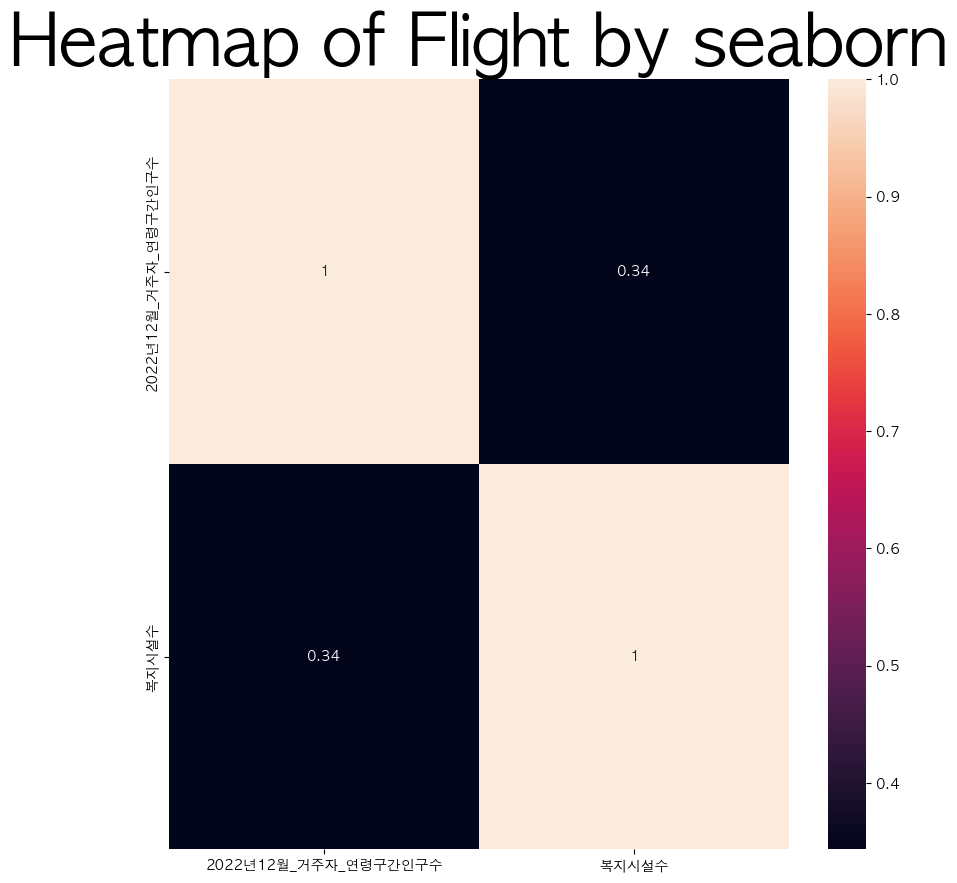

In [17]:
plt.figure(figsize=(10, 10)) 
ax = sns.heatmap(disf.corr(),annot=True)
plt.title('Heatmap of Flight by seaborn', fontsize=50)

plt.show() 

In [18]:
disf

,2022년12월_거주자_연령구간인구수,복지시설수
행정구역,,
서울특별시 관악구 보라매동,6430,9
서울특별시 관악구 청림동,3900,1
서울특별시 관악구 성현동,7694,2
서울특별시 관악구 행운동,6196,2
서울특별시 관악구 낙성대동,2802,1
서울특별시 관악구 청룡동,6443,5
서울특별시 관악구 은천동,8405,2
서울특별시 관악구 중앙동,3258,2
서울특별시 관악구 인헌동,5713,2


In [19]:
isolation = pd.DataFrame(disf['복지시설수']/disf['2022년12월_거주자_연령구간인구수'])
disf_1 = pd.concat([disf,isolation],axis=1)
disf_1.reset_index(inplace=True)
disf_1

,행정구역,2022년12월_거주자_연령구간인구수,복지시설수,0
0,서울특별시 관악구 보라매동,6430,9,0.001400
1,서울특별시 관악구 청림동,3900,1,0.000256
2,서울특별시 관악구 성현동,7694,2,0.000260
3,서울특별시 관악구 행운동,6196,2,0.000323
4,서울특별시 관악구 낙성대동,2802,1,0.000357
5,서울특별시 관악구 청룡동,6443,5,0.000776
6,서울특별시 관악구 은천동,8405,2,0.000238
7,서울특별시 관악구 중앙동,3258,2,0.000614
8,서울특별시 관악구 인헌동,5713,2,0.000350
9,서울특별시 관악구 남현동,4167,1,0.000240


In [20]:
disf_1.columns = ['지역구','2022년12월_거주자_연령구간인구','복지시설수','비율']
disf_1

,지역구,2022년12월_거주자_연령구간인구,복지시설수,비율
0,서울특별시 관악구 보라매동,6430,9,0.001400
1,서울특별시 관악구 청림동,3900,1,0.000256
2,서울특별시 관악구 성현동,7694,2,0.000260
3,서울특별시 관악구 행운동,6196,2,0.000323
4,서울특별시 관악구 낙성대동,2802,1,0.000357
5,서울특별시 관악구 청룡동,6443,5,0.000776
6,서울특별시 관악구 은천동,8405,2,0.000238
7,서울특별시 관악구 중앙동,3258,2,0.000614
8,서울특별시 관악구 인헌동,5713,2,0.000350
9,서울특별시 관악구 남현동,4167,1,0.000240


In [21]:
import folium
import requests
import json

jpath = 'HangJeongDong.geojson'
seoul_geo = json.load(open(jpath,encoding='utf-8'))

In [22]:

m3 = folium.Map(
    location=[37.4817566, 126.937616],
    zoom_start=13, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m3)


m3

In [23]:
m3.choropleth(geo_data=seoul_geo, # 지도 데이터 (json 형식)   
               data=disf_1,  # 시각화 하고자 하는 데이터 (csv 파일)
               columns=['지역구','비율'], # 시각화 하고자 하는 변수
               key_on='properties.adm_nm', #여기서 id는 주별 좌표, 이름, 주별 고유 id 등 변수의 정보 포함 (csv 파일과 json 파일 매칭)
               fill_color='PuRd', # 색 지정
               fill_opacity=0.8)

m3.save('관악구복지시설비율.html')
m3

In [24]:
#관악구 공원위치데이터
tree = pd.read_csv('서울특별시_관악구_도시공원정보_20221015.csv',encoding='cp949')
tree

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자
0,11620-00001,상도근린공원,근린공원,서울특별시 관악구 국회단지길 144,서울특별시 관악구 봉천동 산 103-52,37.491879,126.941428,87458,배드민턴장,조합놀이대,화장실,NaN,NaN,1940-03-12,서울특별시 관악구청,02-879-6503,2022-10-15
1,11620-00002,호박골,어린이공원,NaN,서울특별시 관악구 신림동 1580-22,37.481976,126.923932,417,NaN,흔들말+조합놀이대,NaN,NaN,NaN,1944-08-10,서울특별시 관악구청,02-879-6504,2022-10-15
2,11620-00003,해태,어린이공원,서울특별시 관악구 서림3길 47,서울특별시 관악구 신림동 103-141,37.472323,126.940612,1359,NaN,그네+흔들말+조합놀이대,NaN,NaN,NaN,1970-07-02,서울특별시 관악구청,02-879-6504,2022-10-15
3,11620-00004,당곡,어린이공원,NaN,서울특별시 관악구 봉천동 662-122,37.488727,126.933572,294,NaN,조합놀이대,NaN,NaN,NaN,1970-07-04,서울특별시 관악구청,02-879-6504,2022-10-15
4,11620-00005,군아파트,어린이공원,NaN,서울특별시 관악구 남현동 602-143,37.471823,126.978932,926,NaN,그네+조합놀이대,NaN,NaN,NaN,1970-08-17,서울특별시 관악구청,02-879-6504,2022-10-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,11620-00072,합실,어린이공원,NaN,서울특별시 관악구 신림동 1704-4,37.465141,126.927068,1297,NaN,그네+흔들말+조합놀이대,NaN,NaN,NaN,1997-11-12,서울특별시 관악구청,02-879-6504,2022-10-15
72,11620-00073,행운동,소공원,NaN,서울특별시 관악구 봉천동 28-82,37.483375,126.959752,401,NaN,NaN,NaN,NaN,NaN,2000-09-14,서울특별시 관악구청,02-879-6504,2022-10-15
73,11620-00074,봉천,어린이공원,NaN,서울특별시 관악구 봉천동 1707-2,37.469312,126.964358,652,NaN,그네+흔들말+조합놀이대,NaN,NaN,NaN,2001-01-01,서울특별시 관악구청,02-879-6504,2022-10-15
74,11620-00075,까치산,소공원,NaN,서울특별시 관악구 봉천동 1728-2,37.483119,126.960301,964,NaN,NaN,NaN,NaN,NaN,2009-09-20,서울특별시 관악구청,02-879-6504,2022-10-15


In [25]:
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

m4 = folium.Map(
    location=[37.4817566, 126.937616],
    zoom_start=13, 
    #tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m4)

# m4.choropleth(geo_data=seoul_geo, # 지도 데이터 (json 형식)   
#                data=disf_1,  # 시각화 하고자 하는 데이터 (csv 파일)
#                columns=['지역구','비율'], # 시각화 하고자 하는 변수
#                key_on='properties.adm_nm', #여기서 id는 주별 좌표, 이름, 주별 고유 id 등 변수의 정보 포함 (csv 파일과 json 파일 매칭)
#                fill_color='PuRd', # 색 지정
#                fill_opacity=0.8)

# m4.save('관악구공원위치.html')
# m4
m4

In [26]:
for i in range(tree['위도'].count()):
    folium.Marker([tree['위도'][i], tree['경도'][i]],
                  icon=folium.Icon(color='green')
             ).add_to(m4)
m4.save('관악구공원위치.html')
m4

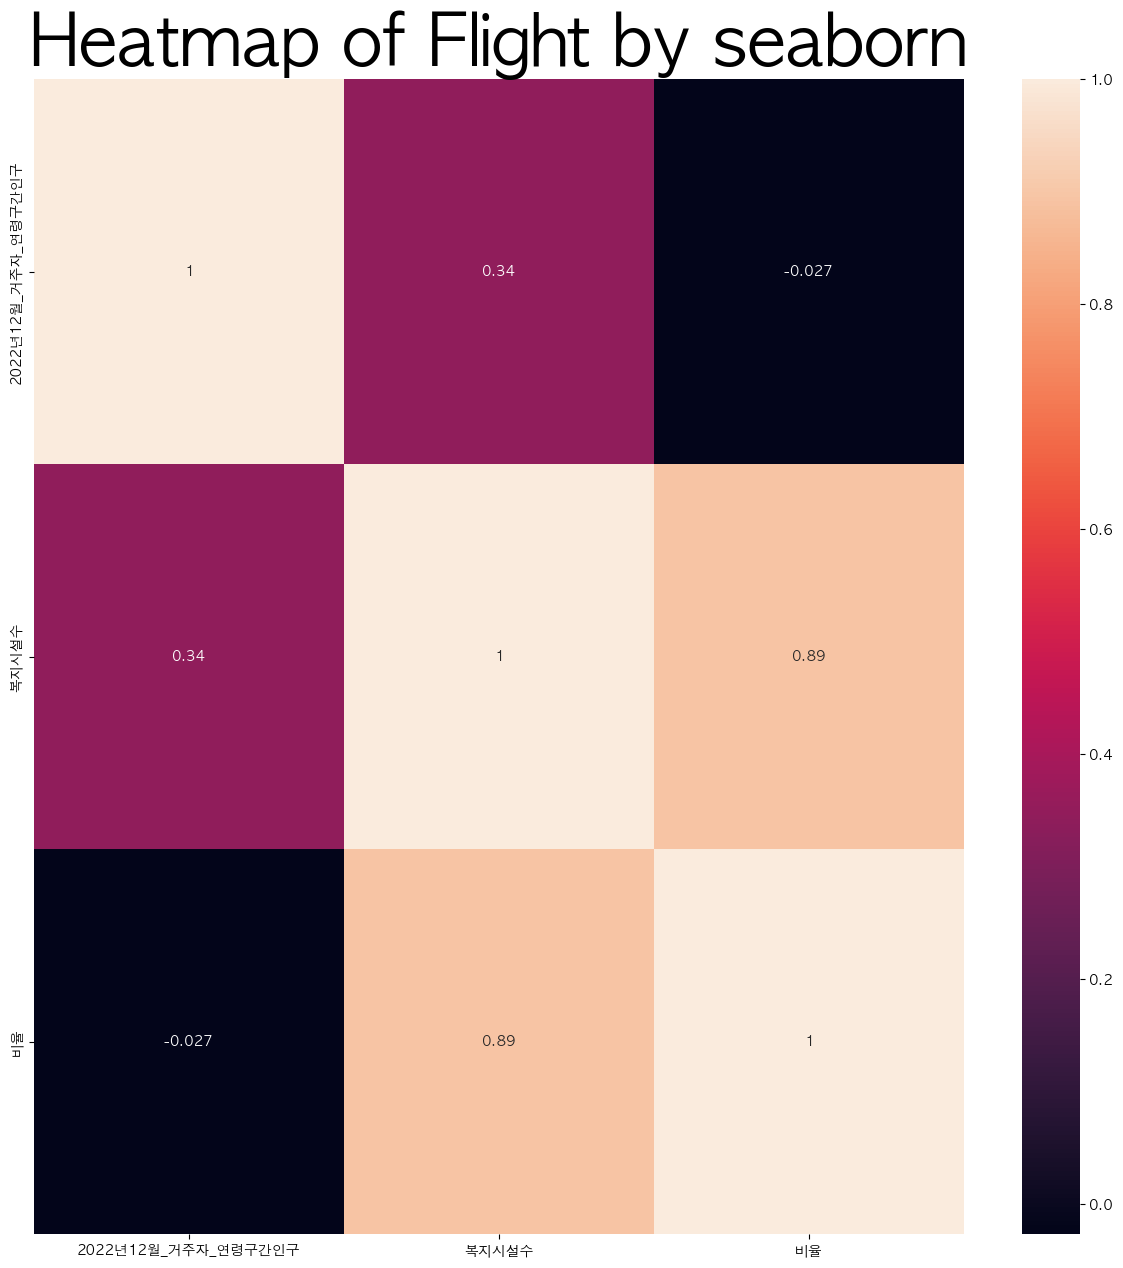

In [27]:
##변수
#1. 인구별 복지지설 수
#2. 공원가까이 있는지
#3. 거주인구

d = disf_1.set_index('지역구')
plt.figure(figsize=(15, 15)) 
ax = sns.heatmap(d.corr(),annot=True)
plt.title('Heatmap of Flight by seaborn', fontsize=50)

plt.show() 


In [28]:
tree['행정구역'] = ['은천동','신원동','서림동','보라매동','남현동','남현동','남현동','남현동','난곡동','신사동','신림동','신림동','조원동','서림동','은천동','은천동','은천동','서원동','청룡동','낙성대동','서림동','난향동','난곡동','미성동','서림동','조원동','청룡동','은천동','보라매동','중앙동','중앙동','행운동','서원동','서림동','신사동','미성동','보라매동','대학동','인헌동','인헌동','난곡동','청룡동','청룡동','행운동','낙성대동','인헌동','삼성동','대학동','대학동','대학동','낙성대동','낙성대동','행운동','미성동','서림동','대학동','난곡동','대학동','미성동','인헌동','청룡동','삼성동','청룡동','난곡동','대학동','미성동','미성동','신원동','보라매동','삼성동','삼성동','행운동','인헌동','행운동','남현동','남현동']
tree['행정구역'].value_counts()

행정구역
대학동     7
청룡동     6
서림동     6
남현동     6
미성동     6
은천동     5
인헌동     5
난곡동     5
행운동     5
낙성대동    4
삼성동     4
보라매동    4
신원동     2
조원동     2
중앙동     2
신림동     2
신사동     2
서원동     2
난향동     1
Name: count, dtype: int64

In [29]:
disf

,2022년12월_거주자_연령구간인구수,복지시설수
행정구역,,
서울특별시 관악구 보라매동,6430,9
서울특별시 관악구 청림동,3900,1
서울특별시 관악구 성현동,7694,2
서울특별시 관악구 행운동,6196,2
서울특별시 관악구 낙성대동,2802,1
서울특별시 관악구 청룡동,6443,5
서울특별시 관악구 은천동,8405,2
서울특별시 관악구 중앙동,3258,2
서울특별시 관악구 인헌동,5713,2


In [30]:
disf['공원수'] = [4,0,0,5,4,6,5,2,5,6,2,2,6,2,2,1,2,7,4,6,5]
disf__1 = disf.reset_index('행정구역', drop=False)
disf__1

,행정구역,2022년12월_거주자_연령구간인구수,복지시설수,공원수
0,서울특별시 관악구 보라매동,6430,9,4
1,서울특별시 관악구 청림동,3900,1,0
2,서울특별시 관악구 성현동,7694,2,0
3,서울특별시 관악구 행운동,6196,2,5
4,서울특별시 관악구 낙성대동,2802,1,4
5,서울특별시 관악구 청룡동,6443,5,6
6,서울특별시 관악구 은천동,8405,2,5
7,서울특별시 관악구 중앙동,3258,2,2
8,서울특별시 관악구 인헌동,5713,2,5
9,서울특별시 관악구 남현동,4167,1,6


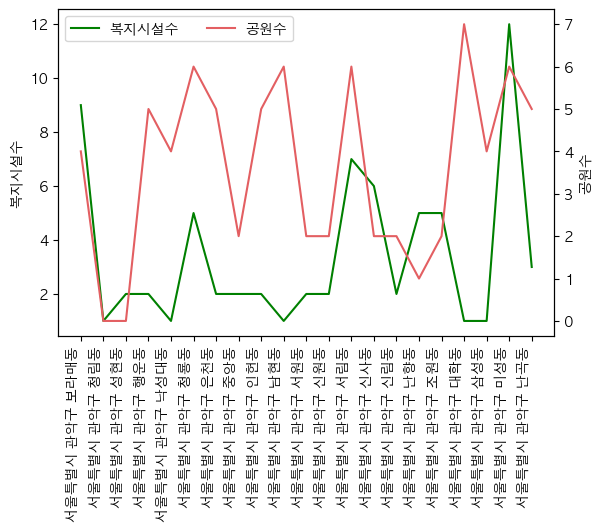

In [31]:
#disf__1 = disf__1.drop(['predicted'], axis = 1)

fig,ax1 = plt.subplots()

line1 = ax1.plot(disf__1['행정구역'],disf__1['복지시설수'],color='green',label='복지시설수')
ax1.set_ylabel('복지시설수')

ax2 = ax1.twinx()
line2 = ax2.plot(disf__1['행정구역'],disf__1['공원수'],color='#e35f62',markersize=7,label='공원수')
ax2.set_xlabel('행정동')
ax2.set_ylabel('공원수')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines,labels,loc='upper left',ncol=2,bbox_to_anchor=(0,1))
fig.autofmt_xdate(rotation=90)
plt.show()

In [6]:
disf_1

NameError: name 'disf_1' is not defined

In [33]:
disf_1['공원수'] = [4,0,0,5,4,6,5,2,5,6,2,2,6,2,2,1,2,7,4,6,5]

In [45]:
disf_1['만족도'] = (disf_1['비율'] * 0.24 + disf_1['공원수'] * 0.228 + disf_1['2022년12월_거주자_연령구간인구']*0.3) / 100
disf_1.sort_values(by=['만족도'],ascending=False)

,지역구,2022년12월_거주자_연령구간인구,복지시설수,비율,공원수,만족도
19,서울특별시 관악구 미성동,8589,12,0.001397,6,25.780683
6,서울특별시 관악구 은천동,8405,2,0.000238,5,25.226401
20,서울특별시 관악구 난곡동,7960,3,0.000377,5,23.891401
2,서울특별시 관악구 성현동,7694,2,0.000260,0,23.082001
18,서울특별시 관악구 삼성동,7634,1,0.000131,4,22.911120
5,서울특별시 관악구 청룡동,6443,5,0.000776,6,19.342682
0,서울특별시 관악구 보라매동,6430,9,0.001400,4,19.299123
3,서울특별시 관악구 행운동,6196,2,0.000323,5,18.599401
8,서울특별시 관악구 인헌동,5713,2,0.000350,5,17.150401
12,서울특별시 관악구 서림동,5105,7,0.001371,6,15.328683


In [5]:
place = pd.read_csv('서울특별시 관악구_노인복지시설.csv',encoding='cp949')
for i in range(len(place)):
    a = place['도로명주소'][i].split(' ')
    place['도로명주소'][i] = " ".join(a[0:4])
place_juso = place['도로명주소']
from geopy.geocoders import Nominatim
geo_local = Nominatim(user_agent='South Korea')

# 위도, 경도 반환하는 함수
def geocoding(place_juso):
    try:
        geo = geo_local.geocode(place_juso)
        x_y = [geo.latitude, geo.longitude]
        return x_y

    except:
        return [0,0]

latitude = []
longitude =[]

for i in place_juso:
    latitude.append(geocoding(i)[0])
    longitude.append(geocoding(i)[1])

In [5]:
address_df = pd.DataFrame({'시설유형': place['시설유형'],'도로명주소': place['도로명주소'],'주소': place_juso,'위도':latitude,'경도':longitude})

#df저장
address_df.to_csv('관악구복지시설위치.csv')

location_final = pd.read_csv('관악구복지시설위치.csv')

NameError: name 'place' is not defined

In [4]:
#상위 5곳 후보지 선정 (공원, 복지시설 위치 시각화)
import folium
import requests
import json

jpath = 'HangJeongDong.geojson'
seoul_geo = json.load(open(jpath,encoding='utf-8'))

m_미성동 = folium.Map(
    location=[37.476135600000, 126.915540500000],
    zoom_start=15,
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m_미성동)
#m_마성동

for i in range(tree['위도'].count()):
    folium.Marker([tree['위도'][i], tree['경도'][i]],
                  icon=folium.Icon(color='green')
             ).add_to(m_미성동)
    
for j in range(location_final['위도'].count()):
    folium.Marker([location_final['위도'][j],location_final['경도'][j]],
                  icon=folium.Icon(color='red')
             ).add_to(m_미성동)

folium.Marker([37.4800726,126.9160396],icon=folium.Icon(color='red')).add_to(m_미성동)
folium.Marker([37.4792009,126.9142202],icon=folium.Icon(color='red')).add_to(m_미성동)
folium.Marker([37.4788936,126.9145445],icon=folium.Icon(color='red')).add_to(m_미성동)
folium.Marker([37.4611964,126.9201228],icon=folium.Icon(color='red')).add_to(m_미성동)
folium.Marker([37.4734184,126.9141322],icon=folium.Icon(color='red')).add_to(m_미성동)
folium.Marker([37.4792286,126.9142009],icon=folium.Icon(color='red')).add_to(m_미성동)
#folium.Marker([37.4611964,126.9201228],icon=folium.Icon(color='red')).add_to(m_미성동)

m_미성동.save('1미성동.html')
m_미성동

NameError: name 'tree' is not defined

In [38]:
#은천동
#상위 5곳 후보지 선정 (공원, 복지시설 위치 시각화)
import folium
import requests
import json

jpath = 'HangJeongDong.geojson'
seoul_geo = json.load(open(jpath,encoding='utf-8'))

m_은천동 = folium.Map(
    location=[37.4853314,126.9424375],
    zoom_start=15,
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m_은천동)
#m_마성동

for i in range(tree['위도'].count()):
    folium.Marker([tree['위도'][i], tree['경도'][i]],
                  icon=folium.Icon(color='green')
             ).add_to(m_은천동)
    
for j in range(location_final['위도'].count()):
    folium.Marker([location_final['위도'][j],location_final['경도'][j]],
                  icon=folium.Icon(color='red')
             ).add_to(m_은천동)

folium.Marker([37.4917970,126.9426993],icon=folium.Icon(color='red')).add_to(m_은천동)
folium.Marker([37.4862789,126.9410945],icon=folium.Icon(color='red')).add_to(m_은천동)
folium.Marker([37.4886779,126.9413417],icon=folium.Icon(color='red')).add_to(m_은천동)

m_은천동.save('2은천동.html')
m_은천동

In [39]:
#난곡동
#은천동
#상위 5곳 후보지 선정 (공원, 복지시설 위치 시각화)
import folium
import requests
import json

jpath = 'HangJeongDong.geojson'
seoul_geo = json.load(open(jpath,encoding='utf-8'))

m_난곡동 = folium.Map(
    location=[37.4709634,126.9216507],
    zoom_start=15,
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m_난곡동)
#m_마성동

for i in range(tree['위도'].count()):
    folium.Marker([tree['위도'][i], tree['경도'][i]],
                  icon=folium.Icon(color='green')
             ).add_to(m_난곡동)
    
for j in range(location_final['위도'].count()):
    folium.Marker([location_final['위도'][j],location_final['경도'][j]],
                  icon=folium.Icon(color='red')
             ).add_to(m_난곡동)

folium.Marker([37.4700747,126.9245379],icon=folium.Icon(color='red')).add_to(m_난곡동)

m_난곡동.save('3난곡동.html')
m_난곡동

In [40]:
#성현동 
#난곡동
#은천동
#상위 5곳 후보지 선정 (공원, 복지시설 위치 시각화)
import folium
import requests
import json

jpath = 'HangJeongDong.geojson'
seoul_geo = json.load(open(jpath,encoding='utf-8'))

m_삼성동 = folium.Map(
    location=[37.4701010,126.9329630],
    zoom_start=15,
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m_삼성동)

for i in range(tree['위도'].count()):
    folium.Marker([tree['위도'][i], tree['경도'][i]],
                  icon=folium.Icon(color='green')
             ).add_to(m_삼성동)
    
for j in range(location_final['위도'].count()):
    folium.Marker([location_final['위도'][j],location_final['경도'][j]],
                  icon=folium.Icon(color='red')
             ).add_to(m_삼성동)

folium.Marker([37.4700747,126.9245379],icon=folium.Icon(color='red')).add_to(m_삼성동)

m_삼성동.save('4삼성동.html')
m_삼성동

In [41]:
#청룡동
#상위 5곳 후보지 선정 (공원, 복지시설 위치 시각화)
import folium
import requests
import json

jpath = 'HangJeongDong.geojson'
seoul_geo = json.load(open(jpath,encoding='utf-8'))

m_청룡동 = folium.Map(
    location=[37.4791304,126.9416518],
    zoom_start=15,
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m_청룡동)

for i in range(tree['위도'].count()):
    folium.Marker([tree['위도'][i], tree['경도'][i]],
                  icon=folium.Icon(color='green')
             ).add_to(m_청룡동)
    
for j in range(location_final['위도'].count()):
    folium.Marker([location_final['위도'][j],location_final['경도'][j]],
                  icon=folium.Icon(color='red')
             ).add_to(m_청룡동)

folium.Marker([37.4700747,126.9245379],icon=folium.Icon(color='red')).add_to(m_청룡동)

m_청룡동.save('5청룡동.html')
m_청룡동

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
x = disf.drop(["만족도"], axis = 1)
y = disf["만족도"]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 0, shuffle = True)

NameError: name 'disf' is not defined

In [ ]:
forest_model = RandomForestClassifier(n_estimators=15000).fit(x_train, y_train)

In [ ]:
pd.DataFrame(forest_model.feature_importances_, x_train.columns)

,0
2022년12월_거주자_연령구간인구수,0.240319
복지시설수,0.300809
공원수,0.228972
predicted,0.229901


In [ ]:
round(forest_model.predict(x_train).mean(), 3)

7.562

In [ ]:
nth_tree = forest_model.estimators_[100] # 100th tree

In [ ]:
from sklearn.tree import plot_tree # scikit-learn 0.21 부터

In [ ]:
print(classification_report(forest_model.predict(x_test), y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           7       1.00      0.33      0.50         3
           8       0.00      0.00      0.00         0

    accuracy                           0.40         5
   macro avg       0.40      0.27      0.30         5
weighted avg       0.80      0.40      0.50         5



### 정책 제시